<a href="https://colab.research.google.com/github/matteovar/matteovar/blob/main/IA/A2_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '1115665, Adriana Fujita' #@param {type:"string"}
Aluno2 = '1115677, Daniel Henrique' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

Foram escolhidas 12 cidades entre Osasco ate Belo Horizonte com suas distancias entre si. Mostrando o Grafo das cidades, o BFS e o a busca informada Greedy.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **1. Grafo das cidades (2,0)**

In [5]:
#Importa as bibliotecas necessarias
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [6]:
cidade_comeca = 'Osasco'  #Cidade que inicial

In [31]:
def plottree(tree):
    G = nx.DiGraph()
  # Ira cria a raiz e as folhas da arvore junto com as arestas de distancia entre as cidades
    for parent, children in tree.items():
        for child, dist in children.items():
            G.add_edge(parent, child, weight=dist)


    pos = nx.bfs_layout(G, cidade_comeca, align='horizontal')#ira fazer o alinhamento horizontal das cidades conforme a cidade inicial
    labels = nx.get_edge_attributes(G, 'weight') # pega o peso das arestas
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold') #Faz as conexoes
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()#exibe o grafo

In [29]:
#Cidades escolhidas
cidades = {
    'Guarulhos': {'Osasco': 30, 'Barueri': 30, 'Cotia': 40, 'Itapevi': 50, 'Jandira': 50, 'Carapicuíba': 35, 'Sorocaba': 90, 'Ibiúna': 70, 'Itu': 90, 'Campinas': 100, 'Valinhos': 110, 'Belo Horizonte': 590},
    'Osasco': {'Guarulhos': 30, 'Barueri': 10},
    'Barueri': {'Guarulhos': 30, 'Cotia': 20},
    'Cotia': {'Barueri': 20, 'Itapevi': 10},
    'Itapevi': {'Cotia': 10, 'Jandira': 10},
    'Jandira': {'Itapevi': 10},
    'Carapicuíba': {'Guarulhos': 35, 'Sorocaba': 60},
    'Sorocaba': {'Guarulhos': 90, 'Carapicuíba': 60, 'Ibiúna': 30},
    'Ibiúna': {'Sorocaba': 30, 'Itu': 30},
    'Itu': {'Ibiúna': 30, 'Campinas': 50},
    'Campinas': {'Guarulhos': 100, 'Itu': 50, 'Valinhos': 20, 'Belo Horizonte': 500},
    'Valinhos': {'Guarulhos': 110, 'Campinas': 20, 'Belo Horizonte': 510},
    'Belo Horizonte': {'Guarulhos': 590, 'Campinas': 500, 'Valinhos': 510}
}

> ## **1.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

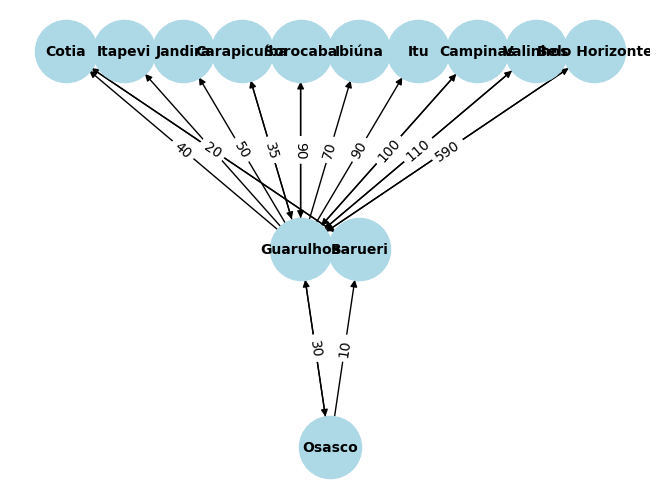

In [32]:
plottree(cidades) #Mostra as cidades

## **2. BFS, Breadth-First Search(2,0)**

In [12]:
#Funcao bfs, aonde ira fazer a travessia dos grafos.
#Comeca do nó principal e vai conforme os nós adjacentes, apos acabar, comecar os adjacentes
def bfs(tree, start):
    visited = []
    queue = deque([start])
    path = []

    while queue:
        node = queue.popleft()
  #Faz a verificacao de se o nó foi visitado, se foi visitado, ele sera marcado
        if node not in visited:
            visited.append(node)
            path.append(node)

            # Coloca na fila todos que nao foram visitados, sendo os filhos.
            for neighbor, dist in tree.get(node, {}).items():
                if neighbor not in visited:
                    queue.append(neighbor)
    return path

> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [13]:
#Chama o path com o bfs, chamando todas as cidades e comecando pela selecionada. Inicia o BFS
path = bfs(cidades, cidade_comeca)
print("Cidades visitadas:", path)

Cidades visitadas: ['Osasco', 'Guarulhos', 'Barueri', 'Cotia', 'Itapevi', 'Jandira', 'Carapicuíba', 'Sorocaba', 'Ibiúna', 'Itu', 'Campinas', 'Valinhos', 'Belo Horizonte']


## **3. Busca Informada (5,0)**

*Indique aqui em um texto o algoritmo de Busca Informada escolhido e o motivo da escolha.*

In [14]:
#Inicia as bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
#Seta uma variavel para a cidade inicial e a cidade final
cidade_comeca = 'Osasco'
cidade_destino = 'Belo Horizonte'


In [23]:
def plottree(tree, path):
    G = nx.DiGraph()
 # Ira cria a raiz e as folhas da arvore junto com as arestas de distancia entre as cidades
    for parent, children in tree.items():
        for child, dist in children.items():
            G.add_edge(parent, child, weight=dist)

    pos = nx.spring_layout(G)#ira fazer a criacao dos vertices
    labels = nx.get_edge_attributes(G, 'weight')# pega o peso das arestas
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold') #Faz as conexoes
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    path_edges = list(zip(path, path[1:])) #Constroi uma linha de arestas conforme o caminho
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)# Caminho sera feito na cor vermelha

    plt.show()#exibe o grafo


In [24]:
#Lista de cidades conectadas e suas distancias
cidades = {
    'Guarulhos': {'Osasco': 30, 'Barueri': 30, 'Cotia': 40, 'Itapevi': 50, 'Jandira': 50, 'Carapicuíba': 35, 'Sorocaba': 90, 'Ibiúna': 70, 'Itu': 90, 'Campinas': 100, 'Valinhos': 110, 'Belo Horizonte': 590},
    'Osasco': {'Guarulhos': 30, 'Barueri': 10},
    'Barueri': {'Guarulhos': 30, 'Cotia': 20},
    'Cotia': {'Barueri': 20, 'Itapevi': 10},
    'Itapevi': {'Cotia': 10, 'Jandira': 10},
    'Jandira': {'Itapevi': 10},
    'Carapicuíba': {'Guarulhos': 35, 'Sorocaba': 60},
    'Sorocaba': {'Guarulhos': 90, 'Carapicuíba': 60, 'Ibiúna': 30},
    'Ibiúna': {'Sorocaba': 30, 'Itu': 30},
    'Itu': {'Ibiúna': 30, 'Campinas': 50},
    'Campinas': {'Guarulhos': 100, 'Itu': 50, 'Valinhos': 20, 'Belo Horizonte': 500},
    'Valinhos': {'Guarulhos': 110, 'Campinas': 20, 'Belo Horizonte': 510},
    'Belo Horizonte': {'Guarulhos': 590, 'Campinas': 500, 'Valinhos': 510}
}

In [25]:
#Funcao de busca gulosa
def greedy_search(tree, start, goal): #Chama a arvore, inicial e o destino
    visited = set() #Armzaenas os vertices visitados
    path = [] #Cria um caminho
    current = start
  #Enquanto o atual nao for o destino final, ele fica em loop
    while current != goal:
      #Ira colocar o atual na lista de caminho e visitado
        path.append(current)
        visited.add(current)

        #Vizinhos pegam em qual estado atual ele esta
        neighbors = tree.get(current, {})


        #Se o caminho nao conseguir chegar no final, da erro
        if not neighbors:
            print("Caminho não encontrado.")
            return path


        #Escolhe o vizinho com menor peso, evita escolher se ja foi visitado
        next_city = min((city for city in neighbors if city not in visited),
                        key=lambda city: neighbors[city],
                        default=None)
        #Se ja passo pelo caminho e esta como NONE, ira mandar essa mensagem
        if next_city is None:
            print("Não foi possível chegar ao destino.")
            return path

        #Atualiza o atual para o proximo nó
        current = next_city

    path.append(goal)
    return path


> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

Não foi possível chegar ao destino.
Caminho encontrado: ['Osasco', 'Barueri', 'Cotia', 'Itapevi', 'Jandira']


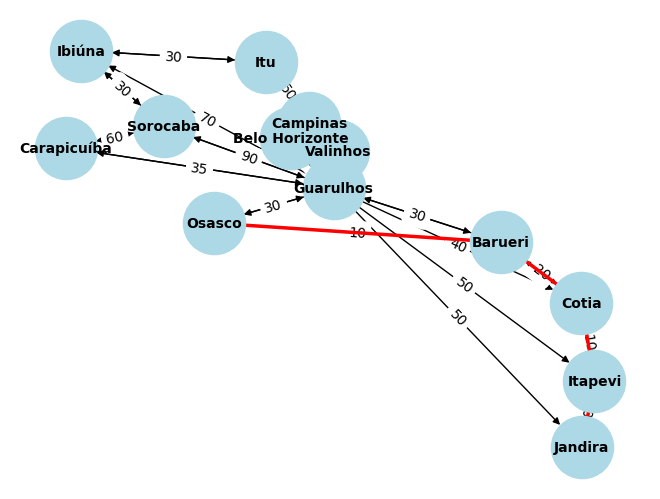

In [22]:
#Chama a funcao para criar o grafo e ver o greedy
path = greedy_search(cidades, cidade_comeca, cidade_destino)
print("Caminho encontrado:", path)
plottree(cidades, path)

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas empregadas em formato ABNT.

Fontes:
BFS:  https://www.ime.usp.br/~pf/algoritmos_para_grafos/aulas/bfs.html?utm_source=chatgpt.com

https://pt.khanacademy.org/computing/computer-science/algorithms/breadth-first-search/a/breadth-first-search-and-its-uses?utm_source=chatgpt.com

Greedy:
https://www.ime.usp.br/~pf/analise_de_algoritmos/aulas/guloso.html

https://pt.stackoverflow.com/questions/103681/o-que-%C3%A9-um-algoritmo-guloso

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
